In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
file_path = 'Desktop/apple-twitter-sentiment-texts.csv'
data = pd.read_csv(file_path)
data.head()


,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [4]:
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
for i in range(len(data.sentiment)):
    if data.sentiment[i] == -1:
        data["sentiment"][i] = "negative"
    elif data.sentiment[i] == 0:
        data["sentiment"][i] = "neutral"
    else:
        data["sentiment"][i] = "positive"
        
data.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,negative
1,What Happened To Apple Inc? http://t.co/FJEX...,neutral
2,Thank u @apple I can now compile all of the pi...,positive
3,The oddly uplifting story of the Apple co-foun...,neutral
4,@apple can i exchange my iphone for a differen...,neutral


In [6]:
data["sentiment"].value_counts()

sentiment
neutral     801
negative    686
positive    143
Name: count, dtype: int64

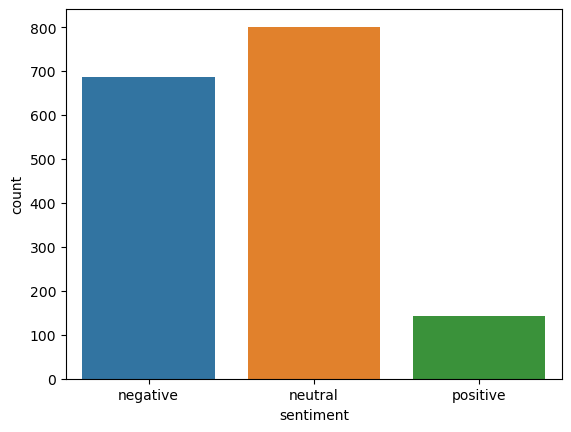

In [7]:
sns.countplot(x="sentiment", data=data)
plt.show()

In [8]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 157036 words in the combination of all review.


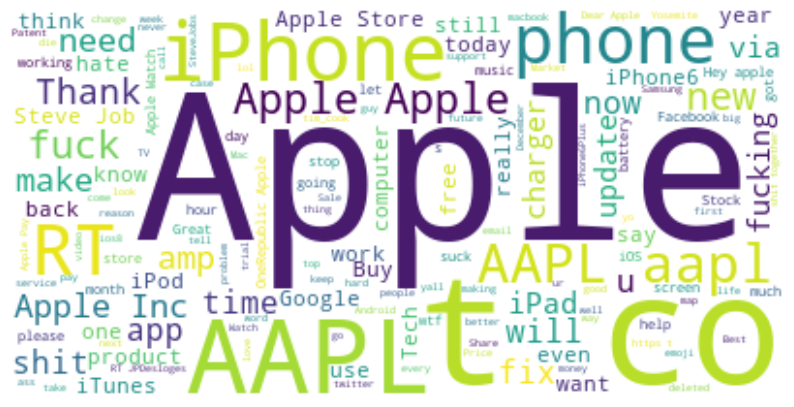

In [9]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
data.iloc[1].text

'What Happened To Apple Inc?   http://t.co/FJEXI3oP0U  #aapl #apple @MoneyPress http://t.co/wXKmmTMArW'

In [11]:
data.iloc[0].text

'Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4'

In [12]:
def remove_chars():
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|#[a-zA-Z]+|$[a-zA-Z]+|@[a-zA-Z]+|[,.^_$*%-;鶯!?:]')
    for i in range(len(data["text"])):
        data["text"][i] = pattern.sub('', data["text"][i])
remove_chars()

data.head()

,text,sentiment
0,Wow Yall needa step it up RT Music and snapc...,negative
1,What Happened To Apple Inc,neutral
2,Thank u I can now compile all of the pics tha...,positive
3,The oddly uplifting story of the Apple cofound...,neutral
4,can i exchange my iphone for a different colo...,neutral


In [13]:
from nltk.corpus import stopwords

In [14]:
data_test = data.copy()
stop = stopwords.words('english')
data_test["text"] = data_test["text"].str.lower().str.split()
data_test["text"] = data_test["text"].apply(lambda x: [item for item in x if item not in stop])
data_test.head()

,text,sentiment
0,"[wow, yall, needa, step, rt, music, snapchat, ...",negative
1,"[happened, apple, inc]",neutral
2,"[thank, u, compile, pics, communicate, one, pl...",positive
3,"[oddly, uplifting, story, apple, cofounder, so...",neutral
4,"[exchange, iphone, different, color, lmao, cha...",neutral


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dogakiran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
data_test = data.copy()
stop = stopwords.words('english')
data_test["text"] = data_test["text"].str.lower().str.split()
data_test["text"] = data_test["text"].apply(lambda x: [item for item in x if item not in stop])
data_test.head()

,text,sentiment
0,"[wow, yall, needa, step, rt, music, snapchat, ...",negative
1,"[happened, apple, inc]",neutral
2,"[thank, u, compile, pics, communicate, one, pl...",positive
3,"[oddly, uplifting, story, apple, cofounder, so...",neutral
4,"[exchange, iphone, different, color, lmao, cha...",neutral


In [17]:
data_test = data_test.assign(text=data_test.text.map(' '.join))

In [18]:
data_test.head()

,text,sentiment
0,wow yall needa step rt music snapchat damn tim...,negative
1,happened apple inc,neutral
2,thank u compile pics communicate one place,positive
3,oddly uplifting story apple cofounder sold sta...,neutral
4,exchange iphone different color lmao changed mind,neutral


In [19]:
max_words = 500
max_len= 20

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer
print('Before Tokenization & Padding \n', data_test['text'][0])

X, tokenizer = tokenize_pad_sequences(data_test['text'])

print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 wow yall needa step rt music snapchat damn time thank
After Tokenization & Padding 
 [336  43 415   2  48 247  27  77   0   0   0   0   0   0   0   0   0   0
   0   0]


In [20]:
y = pd.get_dummies(data_test['sentiment'])
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.10, random_state=1)

print('Train Set ->', train_data.shape, train_label.shape)
print('Test Set ->', test_data.shape, test_label.shape)

Train Set -> (1467, 20) (1467, 3)
Test Set -> (163, 20) (163, 3)


In [21]:
vocab_size = tokenizer.document_count

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.LSTM(16, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
history = model.fit(train_data, train_label, epochs=10, validation_data=(test_data, test_label))

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.4410 - loss: 1.0790 - val_acc: 0.5644 - val_loss: 0.9689
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5177 - loss: 0.9450 - val_acc: 0.5644 - val_loss: 0.9091
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5583 - loss: 0.8675 - val_acc: 0.7239 - val_loss: 0.7057
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8246 - loss: 0.5553 - val_acc: 0.7485 - val_loss: 0.6844
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8241 - loss: 0.4993 - val_acc: 0.7730 - val_loss: 0.6827
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8455 - loss: 0.4522 - val_acc: 0.7669 - val_loss: 0.7347
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8534 - loss: 0.4186 - val_acc: 0.7607 - val_loss: 0.8015
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8654 - loss: 0.3797 - val_acc: 0.7423 - val_loss: 0.8647
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8636 - loss: 

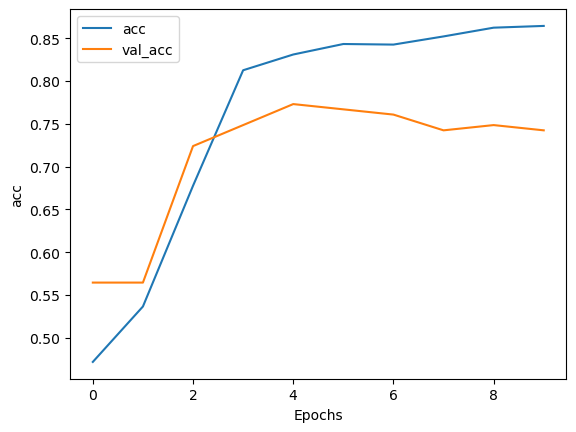

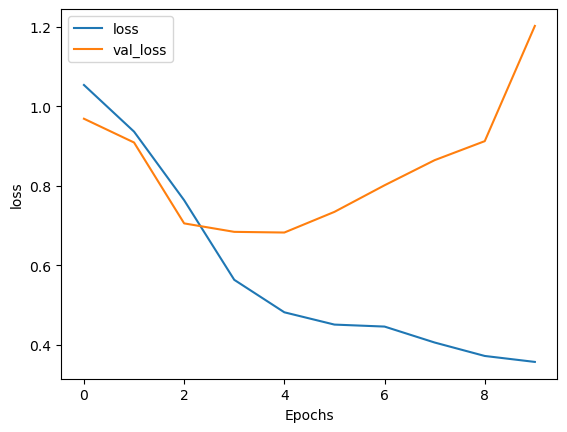

In [23]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Veriyi pandas DataFrame olarak yükleme
file_path = 'Desktop/apple-twitter-sentiment-texts.csv'
data = pd.read_csv(file_path)

# Veriyi eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Metin verisini sayısal vektörlere dönüştürme
vectorizer = CountVectorizer(stop_words='english')
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Naive Bayes modelini eğitme
nb_model = MultinomialNB()
nb_model.fit(X_train_vectors, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = nb_model.predict(X_test_vectors)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy, classification_rep


(0.8220858895705522,
 '              precision    recall  f1-score   support\n\n          -1       0.81      0.88      0.84       137\n           0       0.84      0.87      0.85       165\n           1       0.75      0.12      0.21        24\n\n    accuracy                           0.82       326\n   macro avg       0.80      0.63      0.64       326\nweighted avg       0.82      0.82      0.80       326\n')

In [4]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8220858895705522

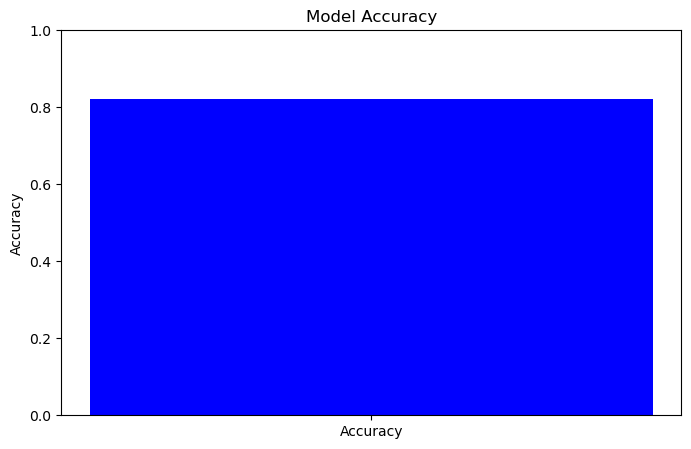

In [5]:
import matplotlib.pyplot as plt

# Modelin doğruluk oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)

# Doğruluk grafiğini çizdirme
plt.figure(figsize=(8, 5))
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim([0, 1])  # Y ekseni sınırlarını belirle
plt.show()

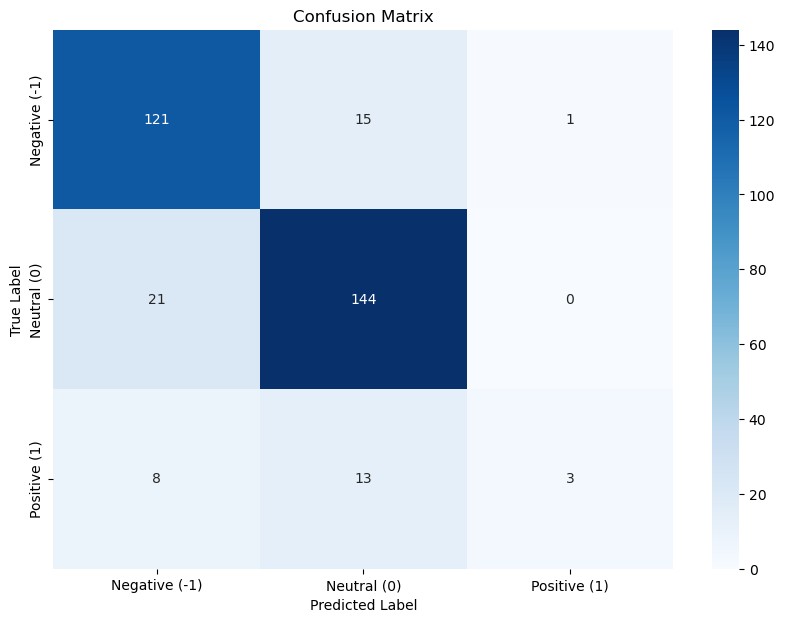

In [9]:
import seaborn as sns

# Karışıklık matrisini çizdirmek için Seaborn kütüphanesi kullanılacak
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'], yticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
